In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify

In [27]:
od_deaths = pd.read_csv('data/opiate_deaths.csv', dtype={'INJURY_FIPS':str})
mn_deaths = od_deaths.loc[od_deaths['INJURYSTATE'] == 'MINNESOTA']

In [28]:
od_deaths.columns

Index(['STATEID', 'FIRSTNAME', 'MIDDLENAME', 'LASTNAME', 'MAIDENNAME',
       'SUFFIX', 'BIRTHDATE', 'DEATHDATE', 'GENDER', 'RACE',
       'HISPANICETHNICITY', 'AGEYEARS', 'RESADDRESS', 'RESSTATE', 'RESCITY',
       'RESCOUNTY', 'ZIP', 'ARMEDFORCES', 'YEARSEDUCATION', 'OCCUPATION',
       'INDUSTRY', 'MARITALSTATUS', 'PLACETYPE', 'DEATHCITY', 'DEATHCOUNTY',
       'MANNERDEATH', 'INJURY_DATE', 'INJURYPLACE', 'INJURYSTATE',
       'INJURYCOUNTY', 'INJURY_FIPS', 'INJURYDESC', 'CAUSEA', 'CAUSEB'],
      dtype='object')

In [54]:
#county fips = GEOID
mn_cnty = gpd.read_file('gis/tl_2015_mn_county/tl_2015_mn_county.shp')

#county fips = INJURY_FIPS
by_cnty = mn_deaths.groupby('INJURY_FIPS')['STATEID'].count()

#join data to shapefile
geo_deaths = mn_cnty.merge(by_cnty, left_on='GEOID', right_on='INJURY_FIPS')
geo_deaths = geo_deaths.rename(columns={'STATEID':'od_deaths'})
geo_deaths = geo_deaths.to_crs({'init': 'epsg:3395'})

/Users/akanik/.virtualenvs/teaching-guide-data-cleaning-and-viz-with--Yo5GS_kn/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


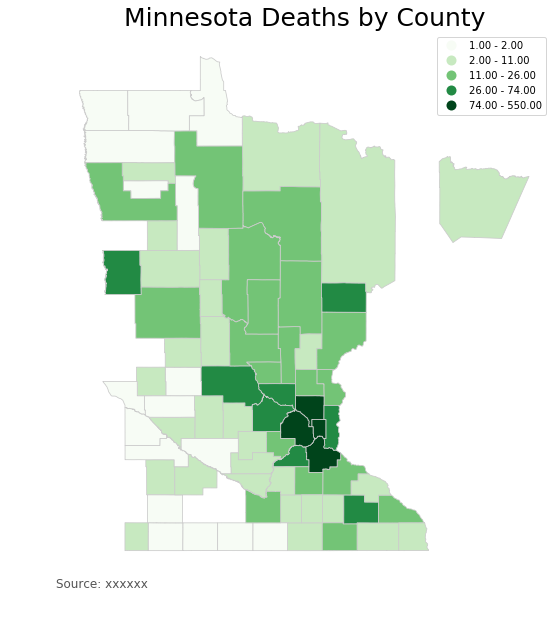

In [55]:
vmin = geo_deaths.od_deaths.min()
vmax = geo_deaths.od_deaths.max()
fig, ax = plt.subplots(1, figsize=(10, 10))

ax.axis('off')
# add a title
ax.set_title('Minnesota Deaths by County', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: xxxxxx', xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#print(mapclassify.JenksCaspall(by_geozip.asset_value, k=5))
geo_deaths.plot(column='od_deaths', cmap='Greens', linewidth=0.8, ax=ax, 
               edgecolor='0.8', scheme='JenksCaspall', legend=True)

Let's make some small multiples to see how things have changed overtime.

In [56]:
od_deaths.INJURY_DATE

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3802    8/31/2016
3803          NaN
3804          NaN
3805    3/23/2014
3806          NaN
Name: INJURY_DATE, Length: 3807, dtype: object

In [ ]:
# Make the graph 20 inches by 40 inches
plt.figure(figsize=(20,40), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1
for countryname, selection in df.groupby("Country"):
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(15, 13, plot_number)
    selection.plot(x='Year', y='GDP_per_capita', ax=ax, label=countryname, legend=False)
    ax.set_title(countryname)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()